In [32]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
import math

In [33]:
data = pd.read_csv('travel_data.tsv', sep='\t', parse_dates=[1])
data.head()

,ga:pagePath,ga:date,ga:sessions
0,www.travelocity.com/flights-search,2017-01-04,364537
1,www.travelocity.com/flights-search,2017-01-05,332169
2,www.travelocity.com/flights-search,2016-12-06,272280
3,www.travelocity.com/,2017-01-03,268885
4,www.travelocity.com/flights-search,2017-01-02,267440


In [34]:
data = data.groupby(['ga:pagePath', 'ga:date']).sum()
data.head()

ga:sessions
ga:pagePath ga:date                
(other)     2016-12-01         8259
            2016-12-02         6419
            2016-12-03         2652
            2016-12-05        14026
            2016-12-06        12698

In [105]:
sess = data.ix['www.travelocity.com/']['ga:sessions']
# sess = sess.reset_index()
# del sess['ga:date']
sess.head()

ga:date
2016-12-01    191696
2016-12-02    170833
2016-12-03    139675
2016-12-04    177041
2016-12-05    213344
Name: ga:sessions, dtype: int64

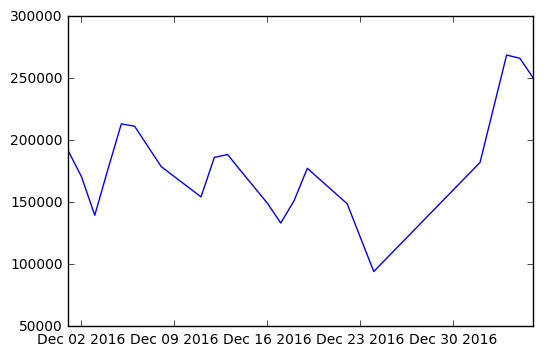

In [106]:
plt.plot(sess)

In [107]:
def test_arima(orders, x):
    order = orders[:3]
    seasonal_order = orders[3:]
    seasonal_order = np.insert(seasonal_order, 3, 7)
    try:
        fit = sm.tsa.statespace.SARIMAX(x, trend='n', order=order, seasonal_order=seasonal_order).fit()
        if math.isnan(rmse(fit.resid)):
            return float('inf')
        return rmse(fit.resid)
    except Exception as err:
        print err
        return float('inf')
        
def rmse(resid):
    rmse = 0
    for r in resid:
        rmse += math.sqrt(r**2)
        
    return rmse

In [108]:
from scipy.optimize import brute
grid = (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
res = brute(test_arima, grid, args=(sess,), finish=None, full_output=False)

Number of states in statespace model must be a positive number.
Number of states in statespace model must be a positive number.
maxlag should be < nobs
maxlag should be < nobs
could not broadcast input array from shape (0,0) into shape (7,7)
maxlag should be < nobs
maxlag should be < nobs
could not broadcast input array from shape (0,0) into shape (14,14)
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
non-invertible starting MA parameters fo

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
maxlag should be < nobs
maxlag should be < nobs
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
max

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
Non-stationary starting autoregressiv

In [109]:
print res

[ 2.  1.  2.  0.  0.  0.]


In [133]:
model = sm.tsa.statespace.SARIMAX(sess, order=(2,1,2))
fit = model.fit()

In [152]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:            ga:sessions   No. Observations:                   21
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -234.471
Date:                Tue, 21 Feb 2017   AIC                            478.941
Time:                        09:48:02   BIC                            484.164
Sample:                    12-01-2016   HQIC                           480.075
                         - 01-05-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2712      0.284      0.956      0.339      -0.285       0.827
ar.L2         -0.8752      0.288     -3.034      0.002      -1.440      -0.310
ma.L1         -0.2907      0.456     -0.638      0.523      -1.184       0.602
ma.L2          0.7093      0.518      1.370      0.171      -0.305       1.724
sigma2      1.079e+09   3.31e-10   3.26e+18      0.000    1.08e+09    1.08e+09
===================================================================================
Ljung-Box (Q):                       16.96   Jarque-Bera (JB):                 2.41
Prob(Q):                              0.59   Prob(JB):                         0.30
Heteroskedasticity (H):               4.72   Skew:                             0.83
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.58e+34. Standard errors may be unstable.
"""

In [226]:
pred_res = fit.get_prediction()
fcast = fit.get_prediction(start='2017-01-05', end=fit.nobs+6)

In [227]:
pred = fcast.predicted_mean
pred.index = pd.date_range(start='2017-01-05', end='2017-01-12')

(0, 450000)

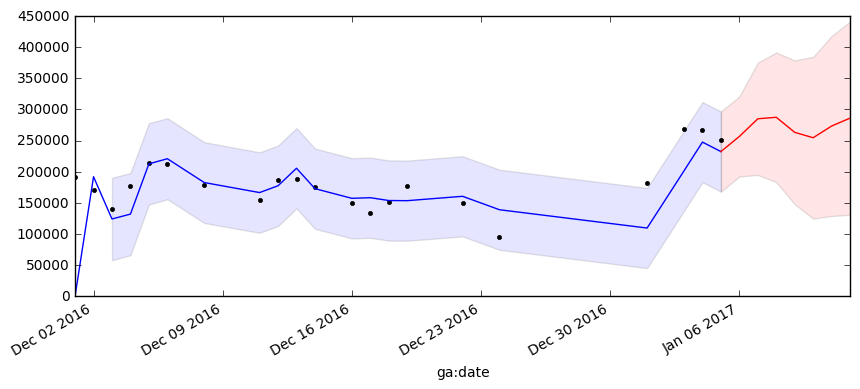

In [225]:
fig, ax = plt.subplots(figsize=(10, 4))

sess.plot(ax=ax, style='k.', label='Obs')
pred_res.predicted_mean.plot(ax=ax, label='Preds')
pred_ci = pred_res.conf_int(alpha=0.05)
pred_index = pred_res.predicted_mean.index
ax.fill_between(pred_index[2:], pred_ci.iloc[2:, 0], pred_ci.iloc[2:, 1], alpha=0.1)

pred.plot(ax=ax, style='r', label='Fcast')
fcast_ci = fcast.conf_int()
fcast_ci.index = pred.index
fcast_index = pred.index
ax.fill_between(fcast_index, fcast_ci.iloc[:, 0], fcast_ci.iloc[:, 1], alpha=0.1, facecolor='red')

ax.set_ylim((0, 450000))
# legend = ax.legend(loc='lower left')